In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
!pip install skimpy
from skimpy import clean_columns
import plotly.express as px
import plotly.io as pio
import pycountry


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when 
# you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 811.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 12.4.4
    Uninstalling rich-12.4.4:
      Successfully uninstalled rich-12.4.4
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
flax 0.5.2 requires rich~=11.1, but you have rich 10.16.2 which is incompatible.
flask 2.1.2 requires click>=8.0, but you have click 7.1.2 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.

In [2]:
# for working on kaggle
df_user=pd.read_csv('/kaggle/input/1-gb-internet-price/worldwide internet users - users.csv')
df_speed=pd.read_csv('/kaggle/input/1-gb-internet-price/worldwide internet speed in 2022  - avg speed.csv')
df_price=pd.read_csv('/kaggle/input/1-gb-internet-price/worldwide internet prices in 2022 - IN 2022.csv')

In [3]:
# for working on VS Code
# df_price = pd.read_csv('worldwide internet prices in 2022 - IN 2022.csv')
# df_speed = pd.read_csv('worldwide internet speed in 2022  - avg speed.csv')
# df_user = pd.read_csv('worldwide internet users - users.csv')

# 1 GB Internet Prices across the world.

# Data Story

* Number of Columns: 9
* Number of Rows : 242

* country_code	: consist of 2 letter and unique for each country - object - ex: IT --> Italy
* name : Name of the countries - object - ex: Italy
* no : The country place on which part of the continents - object - ex: WESTERN EUROPE
* no_of_internet_plans : Number of the internet plans - float64 - ex: 29.0 
* average_price_of_1_gb_euro : Average price for 1GB internet in USD - object - ex: \\$0.27
* cheapest_1_gb_for_30_days_euro : Cheapest internet price for 1GB for 30 days in USD - object ex: \\$0.09
* most_expensive_1_gb_euro : Most expensive internet price for 1 GB in USD - object - ex: \\$3.54
* average_price_of_1_gb_euro_at_the_start_of_2021 : Average internet price for 1 GB in USD at the start of 2021 - object - ex: \\$0.43
* average_price_of_1_gb_euro_at_start_of_2020 : Average internet price for 1 GB in USD at the start of 2020 - object - ex: \\$0.43
* subregion : subregion which the country on - object -  ex: Western Asia
* region : region which the country on - object - ex: Asia
* internet_users : number of the internet users in the country - float - ex: 6788737.0 
* population : number of the people living in the country - float - ex: 8381516.0
* avg_mbit_s_ookla : average speed of the internet in the country - float - ex: 28.01
* average_price_of_2021_2020 : changing percentage of the prices betweeen 2020 and 2021 - float - ex: 12.222222
* internet_user_% : percentage of the internet users in the country

In [4]:
# to show all columns and rows with whole context
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [5]:
# merging dfs
df = pd.merge(df_price, df_user, left_on='Name', right_on='Country or area', how='left')

In [6]:
# merging dfs
df=pd.merge(df, df_speed, left_on='Name', right_on='Country', how='left')

In [7]:
df.head()

,Country code,Name,Continental region,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020),Country or area,Subregion,Region,Internet users,Population,Country,Avg \n(Mbit/s)Ookla
0,IL,Israel,NEAR EAST,27.0,$0.05,$0.02,$20.95,$0.11,$0.90,Israel,Western Asia,Asia,"6,788,737","8,381,516",Israel,28.01
1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,$0.15,$0.10,$7.08,$0.21,$0.27,Kyrgyzstan,Central Asia,Asia,"2,309,235","6,304,030",Kyrgyzstan,16.30
2,FJ,Fiji,OCEANIA,18.0,$0.19,$0.05,$0.85,$0.59,$3.57,Fiji,Melanesia,Oceania,"452,479","883,483",Fiji,25.99
3,IT,Italy,WESTERN EUROPE,29.0,$0.27,$0.09,$3.54,$0.43,$1.73,Italy,Southern Europe,Europe,"50,540,000","60,627,291",Italy,37.15
4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,$0.27,$0.03,$0.92,$0.63,$0.68,Sudan,Northern Africa,Africa,"12,512,639","41,801,533",Sudan,9.50


In [8]:
# dropping duble columns
df=df.drop(['Continental region', 'Country or area','Country'], axis=1)

In [9]:
df.head()

,Country code,Name,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020),Subregion,Region,Internet users,Population,Avg \n(Mbit/s)Ookla
0,IL,Israel,27.0,$0.05,$0.02,$20.95,$0.11,$0.90,Western Asia,Asia,"6,788,737","8,381,516",28.01
1,KG,Kyrgyzstan,20.0,$0.15,$0.10,$7.08,$0.21,$0.27,Central Asia,Asia,"2,309,235","6,304,030",16.30
2,FJ,Fiji,18.0,$0.19,$0.05,$0.85,$0.59,$3.57,Melanesia,Oceania,"452,479","883,483",25.99
3,IT,Italy,29.0,$0.27,$0.09,$3.54,$0.43,$1.73,Southern Europe,Europe,"50,540,000","60,627,291",37.15
4,SD,Sudan,33.0,$0.27,$0.03,$0.92,$0.63,$0.68,Northern Africa,Africa,"12,512,639","41,801,533",9.50


In [10]:
# to clean and standard the column names
df = clean_columns(df, case='snake')
df.head()

,country_code,name,no_of_internet_plans,average_price_of_1_gb_usd,cheapest_1_gb_for_30_days_usd,most_expensive_1_gb_usd,average_price_of_1_gb_usd_at_the_start_of_2021,average_price_of_1_gb_usd_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla
0,IL,Israel,27.0,$0.05,$0.02,$20.95,$0.11,$0.90,Western Asia,Asia,"6,788,737","8,381,516",28.01
1,KG,Kyrgyzstan,20.0,$0.15,$0.10,$7.08,$0.21,$0.27,Central Asia,Asia,"2,309,235","6,304,030",16.30
2,FJ,Fiji,18.0,$0.19,$0.05,$0.85,$0.59,$3.57,Melanesia,Oceania,"452,479","883,483",25.99
3,IT,Italy,29.0,$0.27,$0.09,$3.54,$0.43,$1.73,Southern Europe,Europe,"50,540,000","60,627,291",37.15
4,SD,Sudan,33.0,$0.27,$0.03,$0.92,$0.63,$0.68,Northern Africa,Africa,"12,512,639","41,801,533",9.50


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   country_code                                    242 non-null    object 
 1   name                                            243 non-null    object 
 2   no_of_internet_plans                            231 non-null    float64
 3   average_price_of_1_gb_usd                       243 non-null    object 
 4   cheapest_1_gb_for_30_days_usd                   231 non-null    object 
 5   most_expensive_1_gb_usd                         231 non-null    object 
 6   average_price_of_1_gb_usd_at_the_start_of_2021  231 non-null    object 
 7   average_price_of_1_gb_usd_at_start_of_2020      231 non-null    object 
 8   subregion                                       199 non-null    object 
 9   region                                     

In [12]:
# removing commas from the values
to_remove_comma = ['internet_users', 'population']

In [13]:
# loop for removing commas from columns
for i in to_remove_comma:
    df[i] = df[i].str.replace(r',', '', regex=True).astype('float')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   country_code                                    242 non-null    object 
 1   name                                            243 non-null    object 
 2   no_of_internet_plans                            231 non-null    float64
 3   average_price_of_1_gb_usd                       243 non-null    object 
 4   cheapest_1_gb_for_30_days_usd                   231 non-null    object 
 5   most_expensive_1_gb_usd                         231 non-null    object 
 6   average_price_of_1_gb_usd_at_the_start_of_2021  231 non-null    object 
 7   average_price_of_1_gb_usd_at_start_of_2020      231 non-null    object 
 8   subregion                                       199 non-null    object 
 9   region                                     

In [14]:
# columns will remove usd sign
to_num_columns = ['average_price_of_1_gb_usd', 'cheapest_1_gb_for_30_days_usd', 'most_expensive_1_gb_usd', 'average_price_of_1_gb_usd_at_the_start_of_2021', 'average_price_of_1_gb_usd_at_start_of_2020']

In [15]:
# to get the numeric values
for i in to_num_columns:
    df[i] = df[i].str.extract(r'(\d+.\d+)', expand=True).astype('float')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   country_code                                    242 non-null    object 
 1   name                                            243 non-null    object 
 2   no_of_internet_plans                            231 non-null    float64
 3   average_price_of_1_gb_usd                       231 non-null    float64
 4   cheapest_1_gb_for_30_days_usd                   231 non-null    float64
 5   most_expensive_1_gb_usd                         231 non-null    float64
 6   average_price_of_1_gb_usd_at_the_start_of_2021  229 non-null    float64
 7   average_price_of_1_gb_usd_at_start_of_2020      228 non-null    float64
 8   subregion                                       199 non-null    object 
 9   region                                     

In [16]:
# in the next steps the prices will convert to euro
df.columns = df.columns.str.replace('usd', 'euro', regex=True)
df.head()

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla
0,IL,Israel,27.0,0.05,0.02,20.95,0.11,0.90,Western Asia,Asia,6788737.0,8381516.0,28.01
1,KG,Kyrgyzstan,20.0,0.15,0.10,7.08,0.21,0.27,Central Asia,Asia,2309235.0,6304030.0,16.30
2,FJ,Fiji,18.0,0.19,0.05,0.85,0.59,3.57,Melanesia,Oceania,452479.0,883483.0,25.99
3,IT,Italy,29.0,0.27,0.09,3.54,0.43,1.73,Southern Europe,Europe,50540000.0,60627291.0,37.15
4,SD,Sudan,33.0,0.27,0.03,0.92,0.63,0.68,Northern Africa,Africa,12512639.0,41801533.0,9.50


In [17]:
df.shape

(243, 13)

In [18]:
df2 = df.groupby('country_code')['average_price_of_1_gb_euro'].count().sort_values(ascending=False)
df2.head()

country_code
LB    2
AD    1
NU    1
MW    1
MX    1
Name: average_price_of_1_gb_euro, dtype: int64

In [19]:
df.loc[df['country_code'] == 'LB']

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla
181,LB,Lebanon,15.0,4.81,1.21,77.7,3.82,5.84,Western Asia,Asia,4755187.0,6859408.0,16.38
182,LB,Lebanon,15.0,4.81,1.21,77.7,3.82,5.84,Western Asia,Asia,4755187.0,6859408.0,16.38


In [20]:
df.shape

(243, 13)

In [21]:
df.head()

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla
0,IL,Israel,27.0,0.05,0.02,20.95,0.11,0.90,Western Asia,Asia,6788737.0,8381516.0,28.01
1,KG,Kyrgyzstan,20.0,0.15,0.10,7.08,0.21,0.27,Central Asia,Asia,2309235.0,6304030.0,16.30
2,FJ,Fiji,18.0,0.19,0.05,0.85,0.59,3.57,Melanesia,Oceania,452479.0,883483.0,25.99
3,IT,Italy,29.0,0.27,0.09,3.54,0.43,1.73,Southern Europe,Europe,50540000.0,60627291.0,37.15
4,SD,Sudan,33.0,0.27,0.03,0.92,0.63,0.68,Northern Africa,Africa,12512639.0,41801533.0,9.50


In [22]:
df.tail()

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla
238,VA,Vatican City (Holy See),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,VE,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,South America,Americas,20564451.0,28887118.0,5.68
240,WF,Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,Polynesia,Oceania,1383.0,11661.0,NaN
241,CD,Congo (Democratic Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,ZW,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Africa,Africa,4472992.0,14438802.0,13.99


In [23]:
df.shape

(243, 13)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country_code                                     242 non-null    object 
 1   name                                             243 non-null    object 
 2   no_of_internet_plans                             231 non-null    float64
 3   average_price_of_1_gb_euro                       231 non-null    float64
 4   cheapest_1_gb_for_30_days_euro                   231 non-null    float64
 5   most_expensive_1_gb_euro                         231 non-null    float64
 6   average_price_of_1_gb_euro_at_the_start_of_2021  229 non-null    float64
 7   average_price_of_1_gb_euro_at_start_of_2020      228 non-null    float64
 8   subregion                                        199 non-null    object 
 9   region                          

In [25]:
# changing to columns dtype from object to category
df = df.astype({'subregion':'category', 'region': 'category'})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   country_code                                     242 non-null    object  
 1   name                                             243 non-null    object  
 2   no_of_internet_plans                             231 non-null    float64 
 3   average_price_of_1_gb_euro                       231 non-null    float64 
 4   cheapest_1_gb_for_30_days_euro                   231 non-null    float64 
 5   most_expensive_1_gb_euro                         231 non-null    float64 
 6   average_price_of_1_gb_euro_at_the_start_of_2021  229 non-null    float64 
 7   average_price_of_1_gb_euro_at_start_of_2020      228 non-null    float64 
 8   subregion                                        199 non-null    category
 9   region               

In [27]:
df.isnull().sum().sort_values(ascending=False)

avg_mbit_s_ookla                                   109
population                                          45
subregion                                           44
region                                              44
internet_users                                      44
average_price_of_1_gb_euro_at_start_of_2020         15
average_price_of_1_gb_euro_at_the_start_of_2021     14
no_of_internet_plans                                12
average_price_of_1_gb_euro                          12
cheapest_1_gb_for_30_days_euro                      12
most_expensive_1_gb_euro                            12
country_code                                         1
name                                                 0
dtype: int64

In [28]:
df['average_price_of_2021_2020'] = df['average_price_of_1_gb_euro_at_the_start_of_2021']/df['average_price_of_1_gb_euro_at_start_of_2020'] * 100
df.head()

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020
0,IL,Israel,27.0,0.05,0.02,20.95,0.11,0.90,Western Asia,Asia,6788737.0,8381516.0,28.01,12.222222
1,KG,Kyrgyzstan,20.0,0.15,0.10,7.08,0.21,0.27,Central Asia,Asia,2309235.0,6304030.0,16.30,77.777778
2,FJ,Fiji,18.0,0.19,0.05,0.85,0.59,3.57,Melanesia,Oceania,452479.0,883483.0,25.99,16.526611
3,IT,Italy,29.0,0.27,0.09,3.54,0.43,1.73,Southern Europe,Europe,50540000.0,60627291.0,37.15,24.855491
4,SD,Sudan,33.0,0.27,0.03,0.92,0.63,0.68,Northern Africa,Africa,12512639.0,41801533.0,9.50,92.647059


In [29]:
df['internet_user_%'] = df['internet_users']/df['population'] * 100
df.head()

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
0,IL,Israel,27.0,0.05,0.02,20.95,0.11,0.90,Western Asia,Asia,6788737.0,8381516.0,28.01,12.222222,80.996529
1,KG,Kyrgyzstan,20.0,0.15,0.10,7.08,0.21,0.27,Central Asia,Asia,2309235.0,6304030.0,16.30,77.777778,36.631092
2,FJ,Fiji,18.0,0.19,0.05,0.85,0.59,3.57,Melanesia,Oceania,452479.0,883483.0,25.99,16.526611,51.215360
3,IT,Italy,29.0,0.27,0.09,3.54,0.43,1.73,Southern Europe,Europe,50540000.0,60627291.0,37.15,24.855491,83.361798
4,SD,Sudan,33.0,0.27,0.03,0.92,0.63,0.68,Northern Africa,Africa,12512639.0,41801533.0,9.50,92.647059,29.933445


In [30]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            233, 234, 235, 236, 237, 238, 239, 240, 241, 242],
           dtype='int64', length=243)

In [31]:
# to see the unique values in the 'country_code' column
df.country_code.unique()

array(['IL', 'KG', 'FJ', 'IT', 'SD', 'RU', 'MD', 'BD', 'LK', 'CL', 'FR',
       'ID', 'BY', 'SM', 'VN', 'DZ', 'CN', 'WS', 'PK', 'KZ', 'UZ', 'SO',
       'MN', 'NP', 'TR', 'PL', 'GH', 'IN', 'AU', 'LY', 'UA', 'TZ', 'MU',
       'RE', 'AM', 'MM', 'DK', 'KW', 'YT', 'KH', 'BT', 'HT', 'NG', 'EH',
       'MA', 'MY', 'GP', 'CM', 'BR', 'SN', 'NI', 'MK', 'FI', 'AF', 'EG',
       'EC', 'TH', 'MC', 'TN', 'SG', 'DJ', 'ZM', 'IQ', 'PE', 'AT', 'RO',
       'IS', 'ES', 'RW', 'TO', 'NE', 'RS', 'JE', 'SV', 'LT', 'EE', 'JO',
       'GB', 'IE', 'SE', 'GG', 'SA', 'UY', 'DO', 'IR', 'UG', 'HN', 'GF',
       'AO', 'PW', 'TL', 'HU', 'PS', 'ET', 'SI', 'DM', 'PH', 'GE', 'IM',
       'AZ', 'TT', 'MO', 'GT', 'SR', 'GN', 'AS', 'VI', 'MT', 'BI', 'BH',
       'OM', 'ME', 'GU', 'MP', 'BO', 'BN', 'SZ', 'KE', 'PG', 'BG', 'HK',
       'HR', 'CR', 'BL', 'AR', 'BA', 'VC', 'GD', 'PY', 'CI', 'LR', 'TJ',
       'LC', 'FO', 'LS', 'ZA', 'JM', 'AX', 'GI', 'MZ', 'AL', 'CO', 'CG',
       'BZ', 'LU', 'LI', 'NL', 'LA', 'QA', 'KM', 'M

In [32]:
# to see the rows which has a 'NaN' value
df.loc[df.country_code.isnull()]

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
224,NaN,Namibia,33.0,22.37,1.2,72.06,4.78,11.02,Southern Africa,Africa,933450.0,2448301.0,18.43,43.375681,38.12644


In [33]:
# https://en.wikipedia.org/wiki/Country_code_top-level_domain
# 'Namibia's internet country code get from the link above
# Namibia : NA

df.country_code.iloc[df.loc[df.country_code.isnull()].index] = 'NA'

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [34]:
df.iloc[224].to_frame().T

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
224,NA,Namibia,33.0,22.37,1.2,72.06,4.78,11.02,Southern Africa,Africa,933450.0,2448301.0,18.43,43.375681,38.12644


In [35]:
# to check if there an null cell in the country_code column
df.country_code.isnull().sum()

0

In [36]:
# name column no need action
df.name.isnull().sum()

0

In [37]:
df.region.isnull().sum()

44

In [38]:
df.region.value_counts(dropna=False).to_frame()

,region
Africa,52
Asia,44
Europe,44
NaN,44
Americas,41
Oceania,18


In [39]:
df.no_of_internet_plans.isnull().sum()

12

In [40]:
# there is not internet service in these countries so they were deleted from the df
df.iloc[df.loc[df.no_of_internet_plans.isnull()].index]

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
231,CW,Christmas Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,ER,Eritrea,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Africa,Africa,66402.0,3452786.0,NaN,NaN,1.923143
233,KP,North Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,MH,Marshall Islands,NaN,NaN,NaN,NaN,NaN,NaN,Micronesia,Oceania,20560.0,58413.0,NaN,NaN,35.197644
235,PM,St. Pierre and Miquelon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,SS,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Africa,Africa,1003542.0,10975927.0,NaN,NaN,9.143118
237,TT,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,Polynesia,Oceania,5520.0,11508.0,NaN,NaN,47.966632
238,VA,Vatican City (Holy See),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,VE,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,South America,Americas,20564451.0,28887118.0,5.68,NaN,71.189002
240,WF,Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,Polynesia,Oceania,1383.0,11661.0,NaN,NaN,11.860046


In [41]:
df.shape

(243, 15)

In [42]:
# to delete the full of 'NaN' value rows and reseting index

df.drop(df.loc[df.no_of_internet_plans.isnull()].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(231, 15)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   country_code                                     231 non-null    object  
 1   name                                             231 non-null    object  
 2   no_of_internet_plans                             231 non-null    float64 
 3   average_price_of_1_gb_euro                       231 non-null    float64 
 4   cheapest_1_gb_for_30_days_euro                   231 non-null    float64 
 5   most_expensive_1_gb_euro                         231 non-null    float64 
 6   average_price_of_1_gb_euro_at_the_start_of_2021  229 non-null    float64 
 7   average_price_of_1_gb_euro_at_start_of_2020      228 non-null    float64 
 8   subregion                                        192 non-null    category
 9   region               

In [44]:
df.head()

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
0,IL,Israel,27.0,0.05,0.02,20.95,0.11,0.90,Western Asia,Asia,6788737.0,8381516.0,28.01,12.222222,80.996529
1,KG,Kyrgyzstan,20.0,0.15,0.10,7.08,0.21,0.27,Central Asia,Asia,2309235.0,6304030.0,16.30,77.777778,36.631092
2,FJ,Fiji,18.0,0.19,0.05,0.85,0.59,3.57,Melanesia,Oceania,452479.0,883483.0,25.99,16.526611,51.215360
3,IT,Italy,29.0,0.27,0.09,3.54,0.43,1.73,Southern Europe,Europe,50540000.0,60627291.0,37.15,24.855491,83.361798
4,SD,Sudan,33.0,0.27,0.03,0.92,0.63,0.68,Northern Africa,Africa,12512639.0,41801533.0,9.50,92.647059,29.933445


In [45]:
# average_price_of_1_gb_euro_at_the_start_of_2021 column has 2 missing value
df.loc[df.average_price_of_1_gb_euro_at_the_start_of_2021.isnull()]

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
159,CK,Cook Islands,9.0,3.50,1.49,11.42,NaN,5.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,TV,Tuvalu,9.0,6.35,5.72,10.17,NaN,12.42,Polynesia,Oceania,5520.0,11508.0,NaN,NaN,47.966632


In [46]:
df.shape

(231, 15)

In [47]:
# it is not possible to reach the right value so they are deleted
df.drop(df.loc[df.average_price_of_1_gb_euro_at_the_start_of_2021.isnull()].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(229, 15)

In [48]:
# check cell
df.loc[df.average_price_of_1_gb_euro_at_the_start_of_2021.isnull()]

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%


In [49]:
# average_price_of_1_gb_euro_at_start_of_2020 column has 2 missing value
df.loc[df.average_price_of_1_gb_euro_at_start_of_2020.isnull()]

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
193,VU,Vanuatu,23.0,6.06,0.75,28.23,4.25,NaN,Melanesia,Oceania,71050.0,292680.0,NaN,NaN,24.275659
201,CU,Cuba,9.0,7.50,3.20,12.50,13.33,NaN,Caribbean,Americas,5638956.0,11338134.0,9.1,NaN,49.734427
217,CC,Cocos (Keeling) Islands,2.0,13.47,7.62,19.32,16.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# it is not possible to reach the right value so they are deleted
df.drop(df.loc[df.average_price_of_1_gb_euro_at_start_of_2020.isnull()].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(226, 15)

In [51]:
df.loc[df.average_price_of_1_gb_euro_at_start_of_2020.isnull()]

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%


In [52]:
df.isnull().sum()

country_code                                        0
name                                                0
no_of_internet_plans                                0
average_price_of_1_gb_euro                          0
cheapest_1_gb_for_30_days_euro                      0
most_expensive_1_gb_euro                            0
average_price_of_1_gb_euro_at_the_start_of_2021     0
average_price_of_1_gb_euro_at_start_of_2020         0
subregion                                          37
region                                             37
internet_users                                     37
population                                         38
avg_mbit_s_ookla                                   95
average_price_of_2021_2020                          0
internet_user_%                                    38
dtype: int64

In [53]:
num_df = df.select_dtypes(include=['number'])
num_df.head()

,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
0,27.0,0.05,0.02,20.95,0.11,0.90,6788737.0,8381516.0,28.01,12.222222,80.996529
1,20.0,0.15,0.10,7.08,0.21,0.27,2309235.0,6304030.0,16.30,77.777778,36.631092
2,18.0,0.19,0.05,0.85,0.59,3.57,452479.0,883483.0,25.99,16.526611,51.215360
3,29.0,0.27,0.09,3.54,0.43,1.73,50540000.0,60627291.0,37.15,24.855491,83.361798
4,33.0,0.27,0.03,0.92,0.63,0.68,12512639.0,41801533.0,9.50,92.647059,29.933445


In [54]:
# Currency information was obtained from the link below 
# https://www.google.com/search?q=usd+to+eur&oq=usd+to+&aqs=chrome.0.0i512l2j69i57j0i512l7.2565j1j7&sourceid=chrome&ie=UTF-8

usd_to_euro = 0.99
num_df = num_df * usd_to_euro
num_df.head()

,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
0,26.73,0.0495,0.0198,20.7405,0.1089,0.8910,6720849.63,8297700.84,27.7299,12.100000,80.186563
1,19.80,0.1485,0.0990,7.0092,0.2079,0.2673,2286142.65,6240989.70,16.1370,77.000000,36.264781
2,17.82,0.1881,0.0495,0.8415,0.5841,3.5343,447954.21,874648.17,25.7301,16.361345,50.703207
3,28.71,0.2673,0.0891,3.5046,0.4257,1.7127,50034600.00,60021018.09,36.7785,24.606936,82.528180
4,32.67,0.2673,0.0297,0.9108,0.6237,0.6732,12387512.61,41383517.67,9.4050,91.720588,29.634111


In [55]:
df.head()

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
0,IL,Israel,27.0,0.05,0.02,20.95,0.11,0.90,Western Asia,Asia,6788737.0,8381516.0,28.01,12.222222,80.996529
1,KG,Kyrgyzstan,20.0,0.15,0.10,7.08,0.21,0.27,Central Asia,Asia,2309235.0,6304030.0,16.30,77.777778,36.631092
2,FJ,Fiji,18.0,0.19,0.05,0.85,0.59,3.57,Melanesia,Oceania,452479.0,883483.0,25.99,16.526611,51.215360
3,IT,Italy,29.0,0.27,0.09,3.54,0.43,1.73,Southern Europe,Europe,50540000.0,60627291.0,37.15,24.855491,83.361798
4,SD,Sudan,33.0,0.27,0.03,0.92,0.63,0.68,Northern Africa,Africa,12512639.0,41801533.0,9.50,92.647059,29.933445


# End of Data Cleaning

In [56]:
df.sort_values('no_of_internet_plans', ascending=False)

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
45,MY,Malaysia,60.0,0.89,0.12,7.26,1.12,1.66,South-eastern Asia,Asia,2.534368e+07,3.152803e+07,25.87,67.469880,80.384606
24,TR,Turkey,60.0,0.63,0.05,2.26,0.72,2.25,Southern Europe,Europe,6.994590e+07,8.234009e+07,30.48,32.000000,84.947571
31,TZ,Tanzania,60.0,0.75,0.28,4.31,0.73,3.71,Eastern Africa,Africa,3.000000e+07,5.631344e+07,10.39,19.676550,53.273252
20,UZ,Uzbekistan,60.0,0.60,0.01,23.75,1.34,3.27,Central Asia,Asia,1.669246e+07,3.247624e+07,13.27,40.978593,51.398973
154,DE,Germany,60.0,3.38,0.35,11.83,4.06,6.96,Western Europe,Europe,7.779440e+07,8.312442e+07,55.70,58.333333,93.587909
18,PK,Pakistan,60.0,0.59,0.06,8.59,0.69,1.85,Southern Asia,Asia,1.188000e+08,2.137563e+08,16.73,37.297297,55.577313
110,OM,Oman,60.0,2.12,0.13,8.67,4.58,11.28,Western Asia,Asia,3.717818e+06,4.829473e+06,44.47,40.602837,76.981857
77,GB,United Kingdom,60.0,1.42,0.11,71.29,1.39,6.66,Northern Europe,Europe,6.500102e+07,6.714168e+07,48.10,20.870871,96.811715
135,ZA,South Africa,60.0,2.67,0.12,34.95,4.30,7.77,Southern Africa,Africa,3.185803e+07,5.779252e+07,33.62,55.341055,55.124829
64,AT,Austria,60.0,1.17,0.24,23.43,1.08,1.88,Western Europe,Europe,7.681957e+06,8.891388e+06,56.60,57.446809,86.397726


In [57]:
df.head()

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
0,IL,Israel,27.0,0.05,0.02,20.95,0.11,0.90,Western Asia,Asia,6788737.0,8381516.0,28.01,12.222222,80.996529
1,KG,Kyrgyzstan,20.0,0.15,0.10,7.08,0.21,0.27,Central Asia,Asia,2309235.0,6304030.0,16.30,77.777778,36.631092
2,FJ,Fiji,18.0,0.19,0.05,0.85,0.59,3.57,Melanesia,Oceania,452479.0,883483.0,25.99,16.526611,51.215360
3,IT,Italy,29.0,0.27,0.09,3.54,0.43,1.73,Southern Europe,Europe,50540000.0,60627291.0,37.15,24.855491,83.361798
4,SD,Sudan,33.0,0.27,0.03,0.92,0.63,0.68,Northern Africa,Africa,12512639.0,41801533.0,9.50,92.647059,29.933445


# Bar Plots

<AxesSubplot:xlabel='name'>

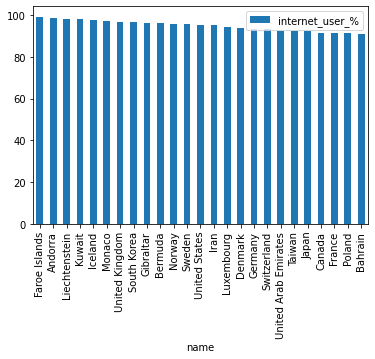

In [58]:
# 25 countries which have the most internet users rate
df.sort_values(by='internet_user_%', ascending=False).head(25).plot.bar(x='name', y='internet_user_%')

<AxesSubplot:xlabel='name'>

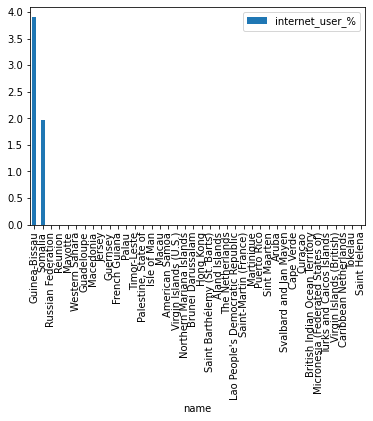

In [59]:
# 40 countries which have the least internet users rate
df.sort_values(by='internet_user_%', ascending=False).tail(40).plot.bar(x='name', y='internet_user_%')

<AxesSubplot:xlabel='name'>

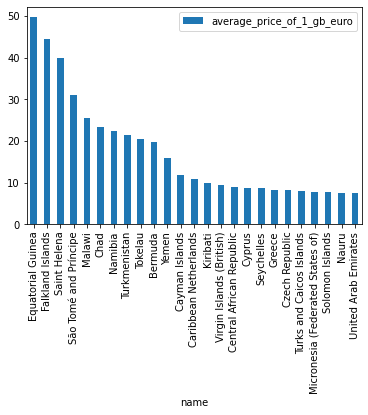

In [60]:
# 25 countries by the average_price_of_1_gb_euro prices
df.sort_values(by='average_price_of_1_gb_euro', ascending=False).head(25).plot.bar(x='name', y='average_price_of_1_gb_euro')

<AxesSubplot:xlabel='name'>

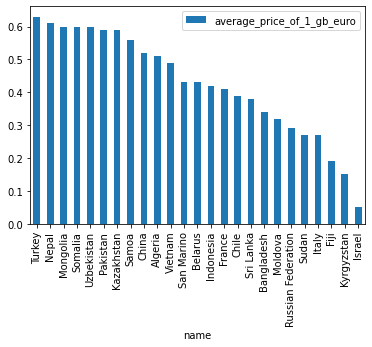

In [61]:
# 25 countries by the average_price_of_1_gb_euro prices
df.sort_values(by='average_price_of_1_gb_euro', ascending=False).tail(25).plot.bar(x='name', y='average_price_of_1_gb_euro')

<AxesSubplot:xlabel='name'>

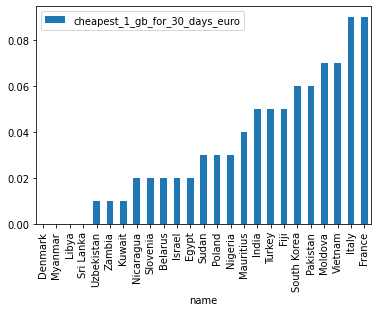

In [62]:
# 25 countries by the cheapest_1_gb_for_30_days_euro prices
df.sort_values(by='cheapest_1_gb_for_30_days_euro', ascending=True).head(25).plot.bar(x='name', y='cheapest_1_gb_for_30_days_euro')

<AxesSubplot:xlabel='name'>

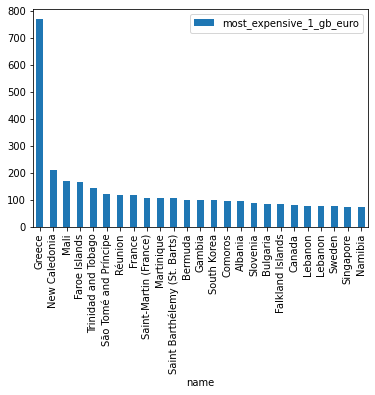

In [63]:
# 25 countries by the most_expensive_1_gb_euro prices
df.sort_values(by='most_expensive_1_gb_euro', ascending=False).head(25).plot.bar(x='name', y='most_expensive_1_gb_euro')

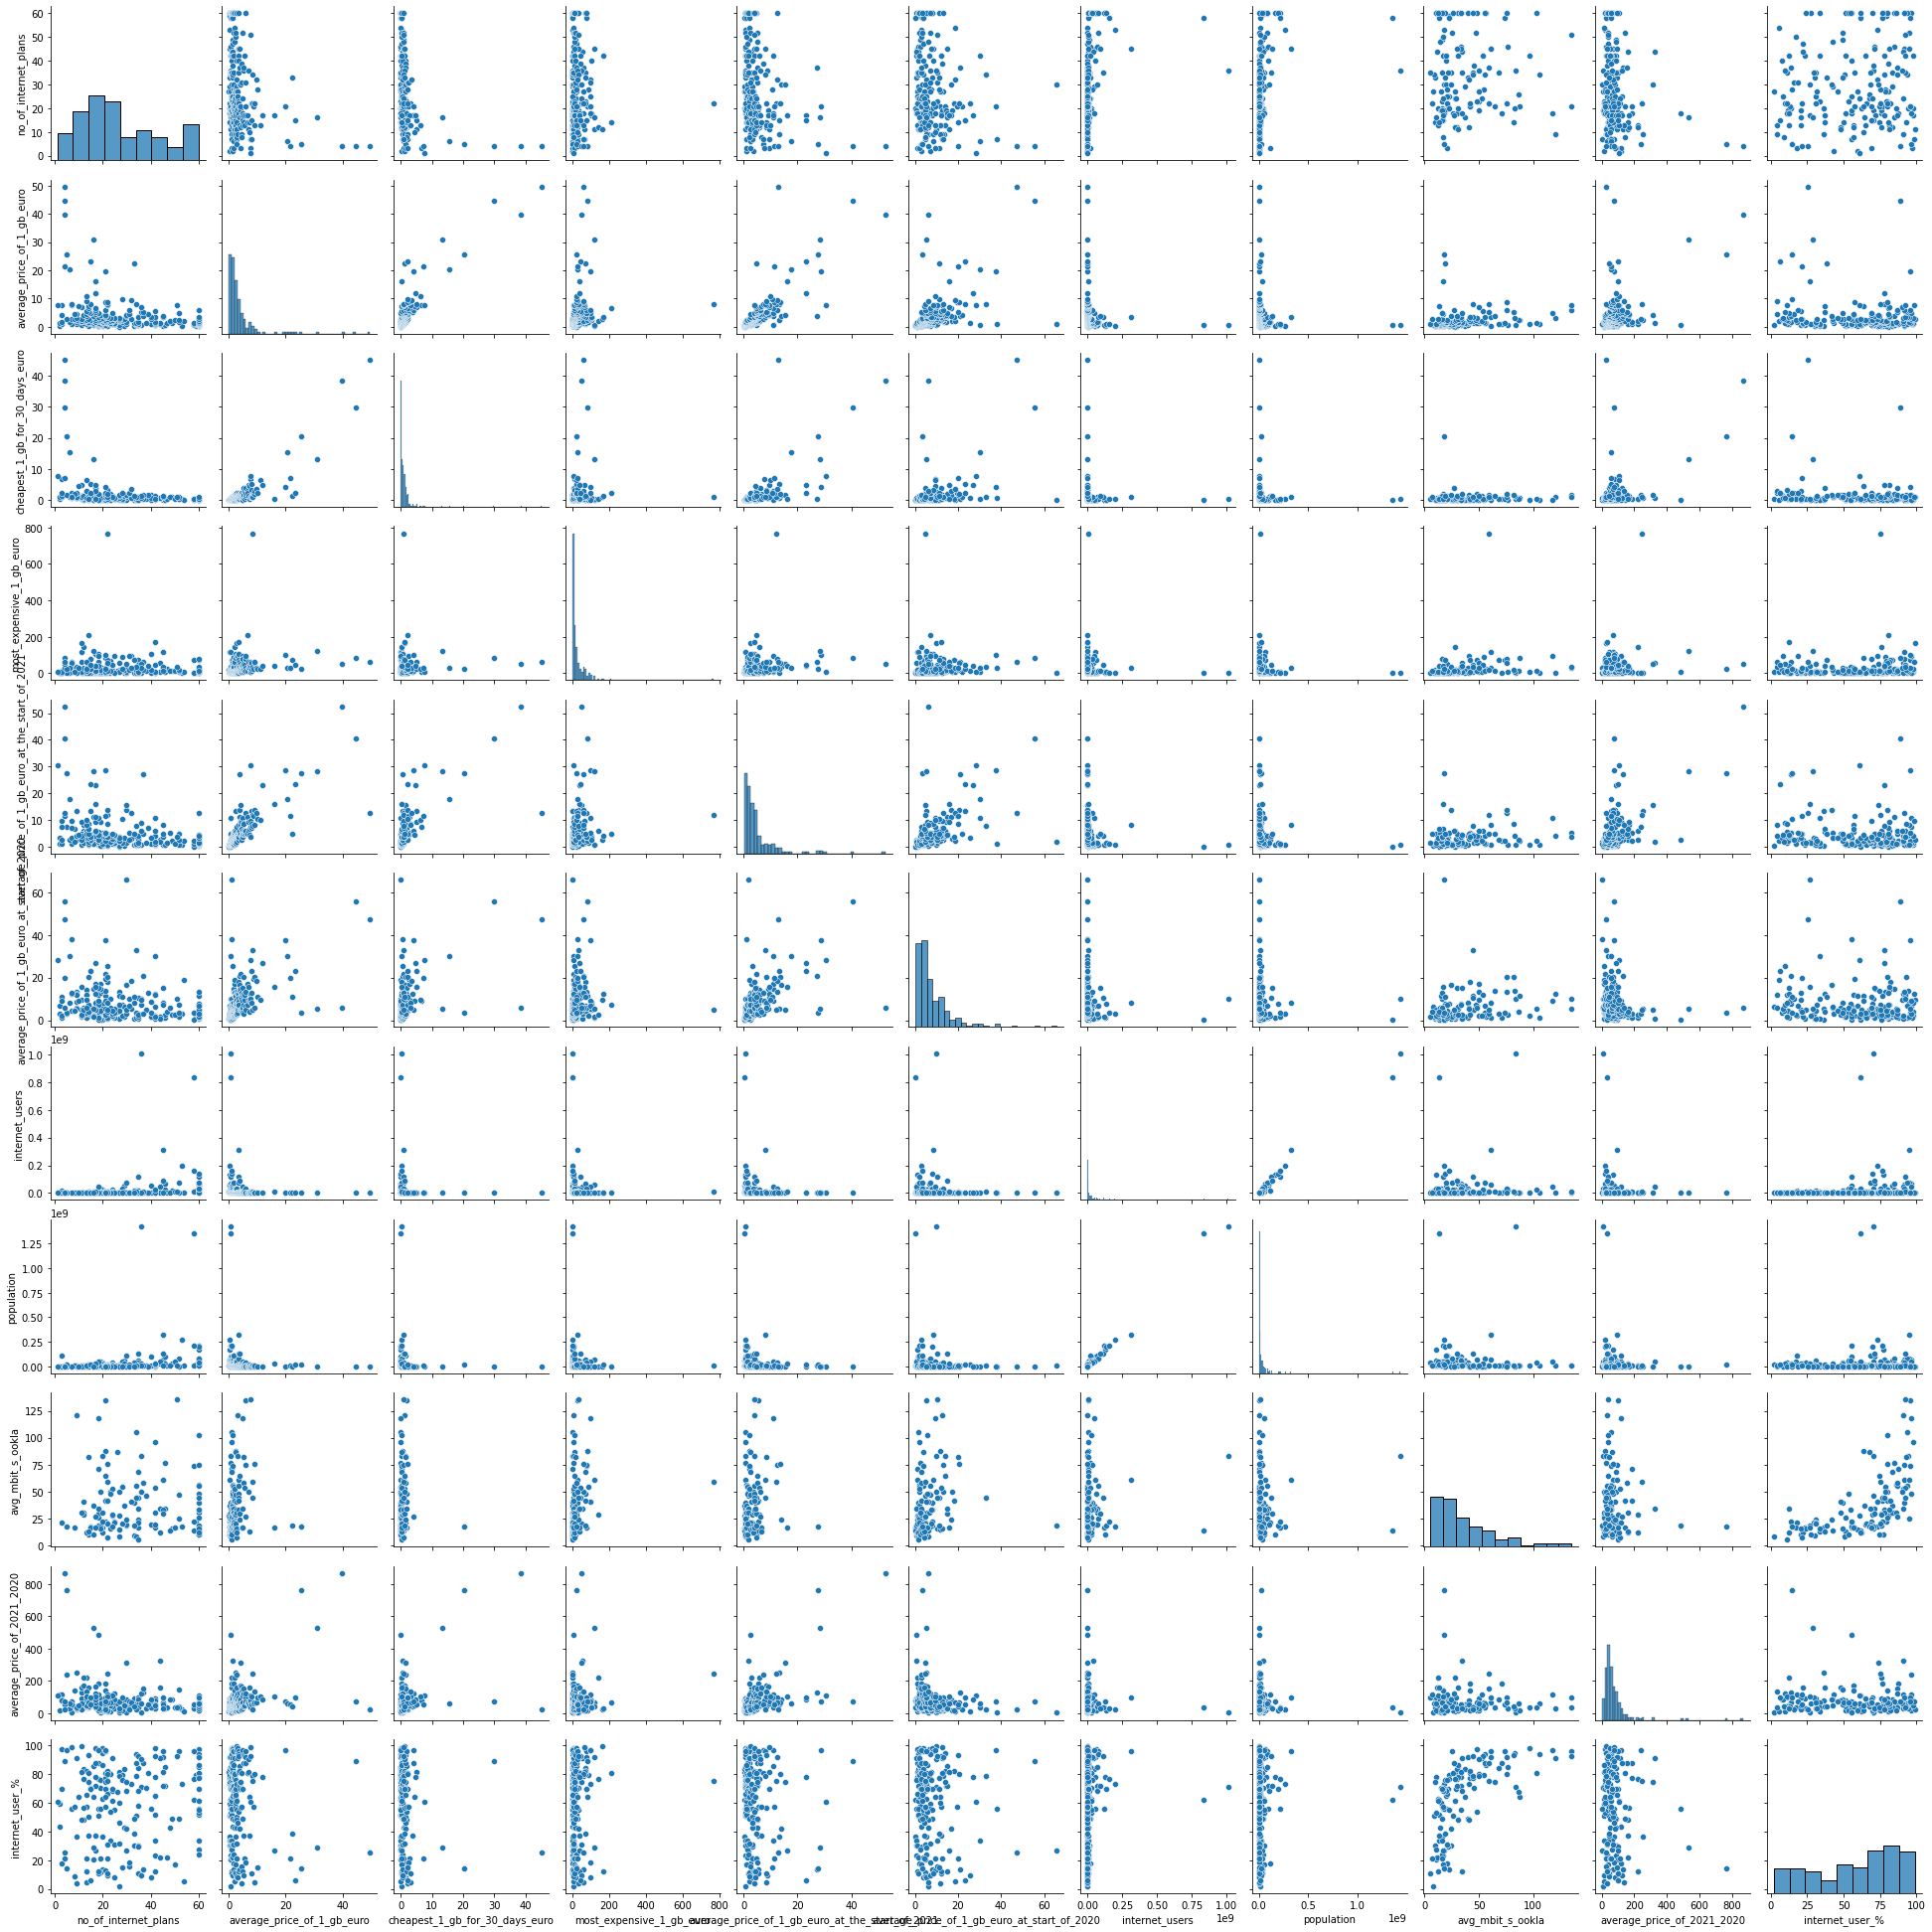

In [64]:
sns.pairplot(df)

In [65]:
df['internet_user_%'].describe()

count    188.000000
mean      58.517194
std       28.260395
min        1.964596
25%       33.530642
50%       65.200167
75%       80.618430
max       99.175207
Name: internet_user_%, dtype: float64

# Boxplot

<AxesSubplot:ylabel='no_of_internet_plans'>

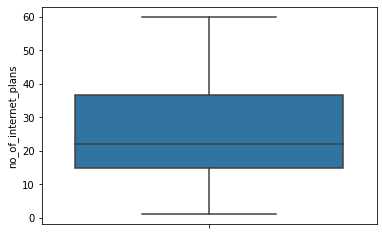

In [66]:
sns.boxplot(y='no_of_internet_plans', data=df)

<AxesSubplot:ylabel='average_price_of_1_gb_euro'>

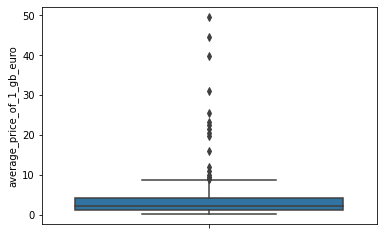

In [67]:
sns.boxplot(y='average_price_of_1_gb_euro', data=df)

<AxesSubplot:ylabel='cheapest_1_gb_for_30_days_euro'>

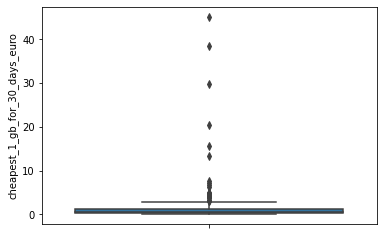

In [68]:
sns.boxplot(y='cheapest_1_gb_for_30_days_euro', data=df)

<AxesSubplot:ylabel='most_expensive_1_gb_euro'>

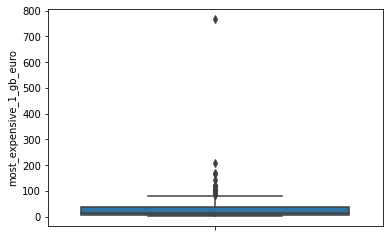

In [69]:
sns.boxplot(y='most_expensive_1_gb_euro', data=df)

<AxesSubplot:ylabel='average_price_of_1_gb_euro_at_the_start_of_2021'>

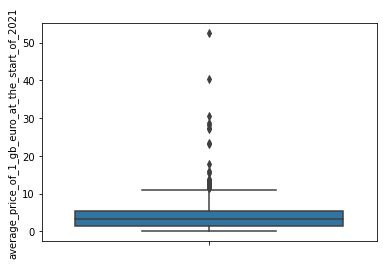

In [70]:
sns.boxplot(y='average_price_of_1_gb_euro_at_the_start_of_2021', data=df)

<AxesSubplot:ylabel='average_price_of_1_gb_euro_at_start_of_2020'>

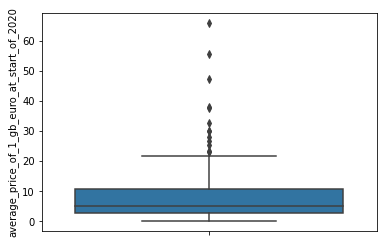

In [71]:
sns.boxplot(y='average_price_of_1_gb_euro_at_start_of_2020', data=df)

<AxesSubplot:ylabel='internet_users'>

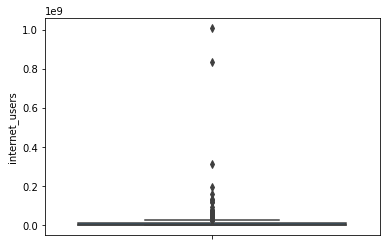

In [72]:
sns.boxplot(y='internet_users', data=df)

<AxesSubplot:ylabel='avg_mbit_s_ookla'>

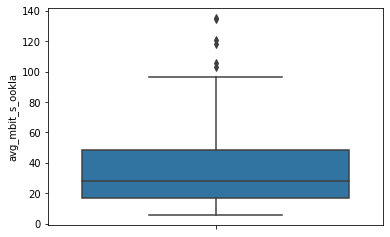

In [73]:
sns.boxplot(y='avg_mbit_s_ookla', data=df)

<AxesSubplot:ylabel='average_price_of_2021_2020'>

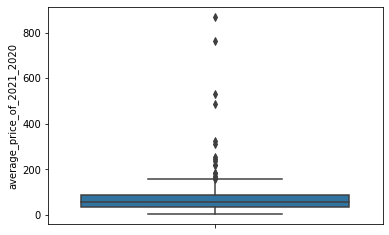

In [74]:
sns.boxplot(y='average_price_of_2021_2020', data=df)

<AxesSubplot:ylabel='internet_user_%'>

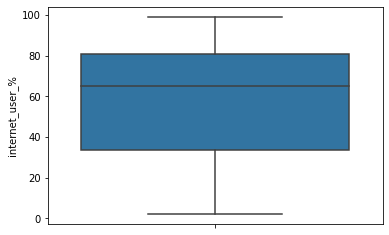

In [75]:
sns.boxplot(y='internet_user_%', data=df)

# Histograms

<AxesSubplot:ylabel='Frequency'>

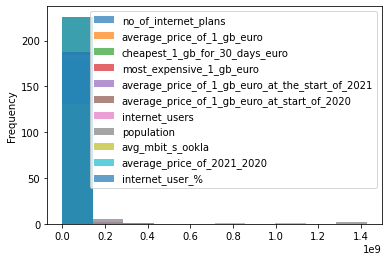

In [76]:
df.plot.hist(alpha=0.7)

array([[<AxesSubplot:title={'center':'no_of_internet_plans'}>,
        <AxesSubplot:title={'center':'average_price_of_1_gb_euro'}>,
        <AxesSubplot:title={'center':'cheapest_1_gb_for_30_days_euro'}>],
       [<AxesSubplot:title={'center':'most_expensive_1_gb_euro'}>,
        <AxesSubplot:title={'center':'average_price_of_1_gb_euro_at_the_start_of_2021'}>,
        <AxesSubplot:title={'center':'average_price_of_1_gb_euro_at_start_of_2020'}>],
       [<AxesSubplot:title={'center':'internet_users'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'avg_mbit_s_ookla'}>],
       [<AxesSubplot:title={'center':'average_price_of_2021_2020'}>,
        <AxesSubplot:title={'center':'internet_user_%'}>, <AxesSubplot:>]],
      dtype=object)

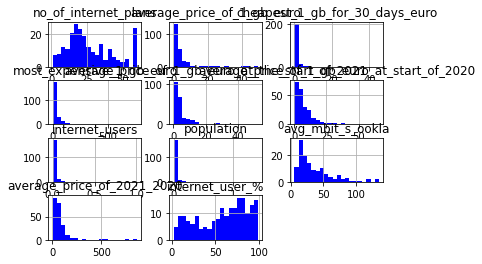

In [77]:
df.hist(color='blue', alpha=1, bins=20)

# Boxs

In [78]:
# df.plot.box()

In [79]:
# colors = {'boxes': 'red', 'whiskers':'blue', 'medians':'black', 'caps':'green'}
# df.plot.box(color=colors)

In [80]:
df['internet_user_%'].mean()

58.51719350474243

In [81]:
# Countries whose internet user% is below average - (internet_user_%'s mean is 57.22)
df[(df['internet_user_%']>0) & (df['internet_user_%']<df['internet_user_%'].mean())]

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
1,KG,Kyrgyzstan,20.0,0.15,0.10,7.08,0.21,0.27,Central Asia,Asia,2309235.0,6304030.0,16.30,77.777778,36.631092
2,FJ,Fiji,18.0,0.19,0.05,0.85,0.59,3.57,Melanesia,Oceania,452479.0,883483.0,25.99,16.526611,51.215360
4,SD,Sudan,33.0,0.27,0.03,0.92,0.63,0.68,Northern Africa,Africa,12512639.0,41801533.0,9.50,92.647059,29.933445
8,LK,Sri Lanka,60.0,0.38,0.00,5.53,0.51,0.78,Southern Asia,Asia,7121116.0,21228763.0,13.15,65.384615,33.544658
17,WS,Samoa,42.0,0.56,0.19,6.86,10.86,30.09,Polynesia,Oceania,66023.0,196129.0,NaN,36.091725,33.663048
18,PK,Pakistan,60.0,0.59,0.06,8.59,0.69,1.85,Southern Asia,Asia,118800000.0,213756286.0,16.73,37.297297,55.577313
20,UZ,Uzbekistan,60.0,0.60,0.01,23.75,1.34,3.27,Central Asia,Asia,16692456.0,32476244.0,13.27,40.978593,51.398973
21,SO,Somalia,27.0,0.60,0.18,6.67,0.50,6.19,Eastern Africa,Africa,294851.0,15008226.0,7.95,8.077544,1.964596
22,MN,Mongolia,42.0,0.60,0.22,3.70,0.74,0.82,Eastern Asia,Asia,729236.0,3170216.0,16.69,90.243902,23.002723
23,NP,Nepal,35.0,0.61,0.22,2.66,0.86,2.25,Southern Asia,Asia,16190000.0,28095714.0,16.45,38.222222,57.624448


# Scatters

In [82]:
plt.style.use('seaborn-whitegrid')

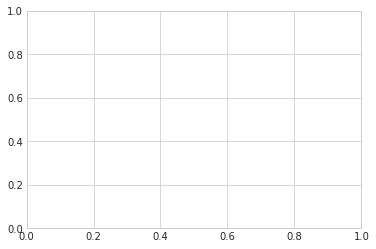

In [83]:
fig=plt.figure()
ax=plt.axes()

In [84]:
df.columns

Index(['country_code', 'name', 'no_of_internet_plans',
       'average_price_of_1_gb_euro', 'cheapest_1_gb_for_30_days_euro',
       'most_expensive_1_gb_euro',
       'average_price_of_1_gb_euro_at_the_start_of_2021',
       'average_price_of_1_gb_euro_at_start_of_2020', 'subregion', 'region',
       'internet_users', 'population', 'avg_mbit_s_ookla',
       'average_price_of_2021_2020', 'internet_user_%'],
      dtype='object')

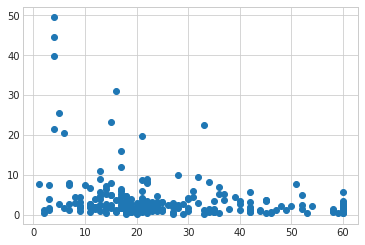

In [85]:
plt.plot(df.no_of_internet_plans, df.average_price_of_1_gb_euro, 'o')

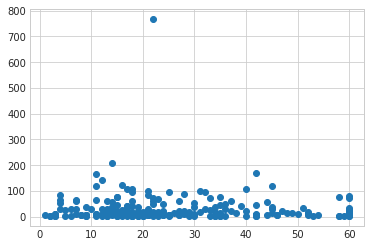

In [86]:
plt.plot(df.no_of_internet_plans, df.most_expensive_1_gb_euro, 'o')

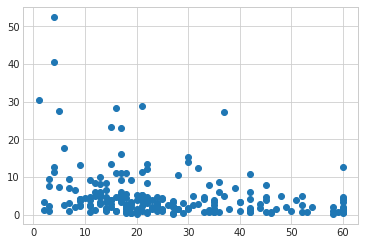

In [87]:
plt.plot(df.no_of_internet_plans, df.average_price_of_1_gb_euro_at_the_start_of_2021, 'o')

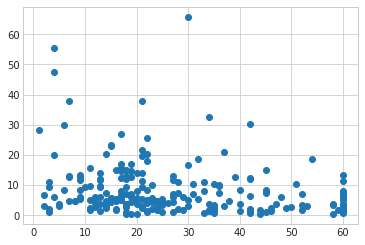

In [88]:
plt.plot(df.no_of_internet_plans, df.average_price_of_1_gb_euro_at_start_of_2020, 'o')

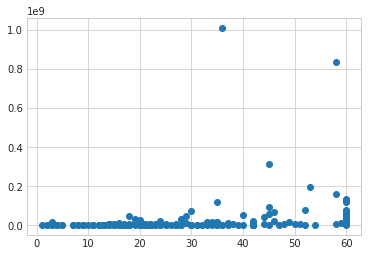

In [89]:
plt.plot(df.no_of_internet_plans, df.internet_users, 'o')

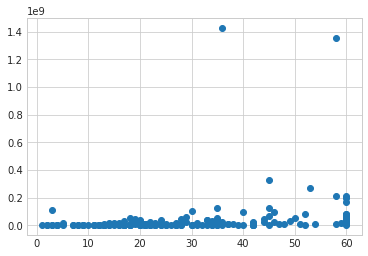

In [90]:
plt.plot(df.no_of_internet_plans, df.population, 'o')

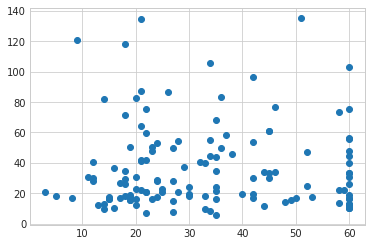

In [91]:
plt.plot(df.no_of_internet_plans, df.avg_mbit_s_ookla, 'o')

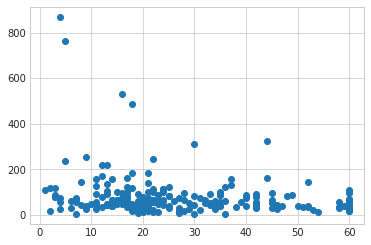

In [92]:
plt.plot(df.no_of_internet_plans, df.average_price_of_2021_2020, 'o')

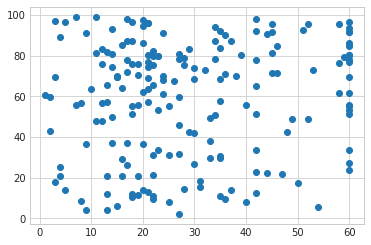

In [93]:
plt.plot(df.no_of_internet_plans, df['internet_user_%'], 'o')

# Scatter Plot Matris

In [94]:
from pandas.plotting import scatter_matrix

In [95]:
# scatter_matrix(df, alpha=0.5, diagonal='kde')

# Heatmap

<AxesSubplot:>

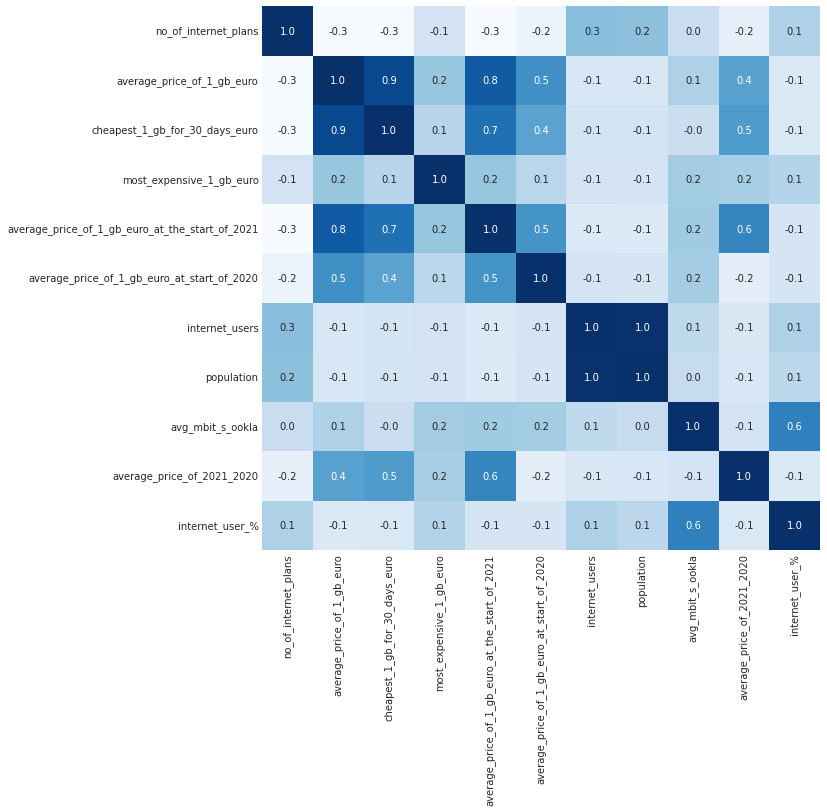

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cbar=False, cmap='Blues', fmt='.1f')

# Lines

In [97]:
plt.style.use('seaborn-whitegrid')

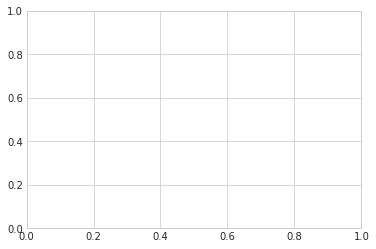

In [98]:
fig=plt.figure()
ax=plt.axes()

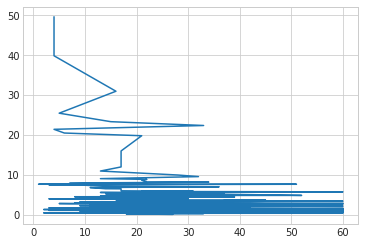

In [99]:
fig=plt.figure()
ax=plt.axes()
x=df.no_of_internet_plans
y=df.average_price_of_1_gb_euro
ax.plot(x,y)

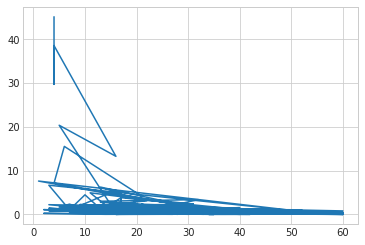

In [100]:
fig=plt.figure()
ax=plt.axes()
x=df.no_of_internet_plans
y=df.cheapest_1_gb_for_30_days_euro
ax.plot(x,y)

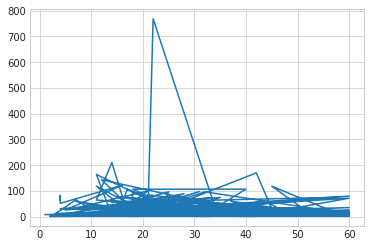

In [101]:
fig=plt.figure()
ax=plt.axes()
x=df.no_of_internet_plans
y=df.most_expensive_1_gb_euro
ax.plot(x,y)

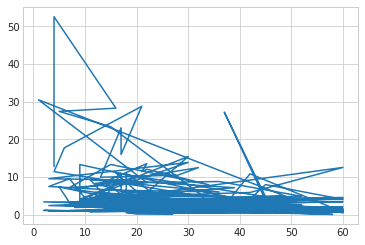

In [102]:
fig=plt.figure()
ax=plt.axes()
x=df.no_of_internet_plans
y=df.average_price_of_1_gb_euro_at_the_start_of_2021
ax.plot(x,y)

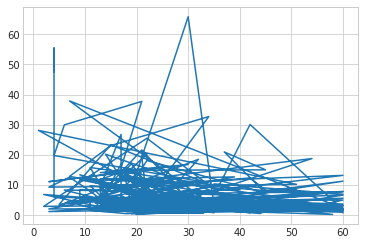

In [103]:
fig=plt.figure()
ax=plt.axes()
x=df.no_of_internet_plans
y=df.average_price_of_1_gb_euro_at_start_of_2020
ax.plot(x,y)

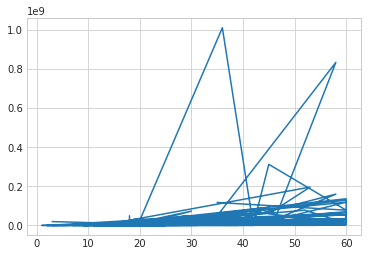

In [104]:
fig=plt.figure()
ax=plt.axes()
x=df.no_of_internet_plans
y=df.internet_users
ax.plot(x,y)

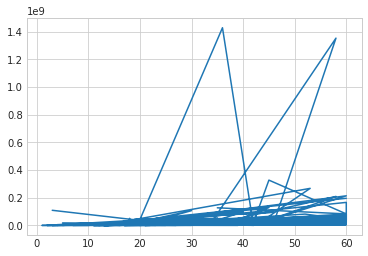

In [105]:
fig=plt.figure()
ax=plt.axes()
x=df.no_of_internet_plans
y=df.population
ax.plot(x,y)

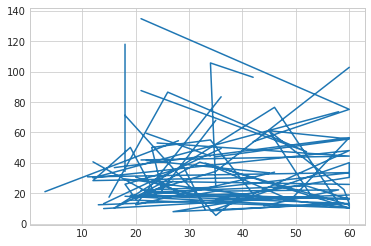

In [106]:
fig=plt.figure()
ax=plt.axes()
x=df.no_of_internet_plans
y=df.avg_mbit_s_ookla
ax.plot(x,y)

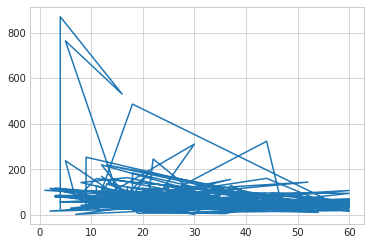

In [107]:
fig=plt.figure()
ax=plt.axes()
x=df.no_of_internet_plans
y=df.average_price_of_2021_2020
ax.plot(x,y)

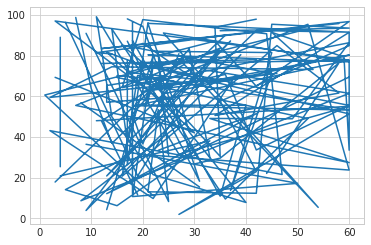

In [108]:
fig=plt.figure()
ax=plt.axes()
x=df.no_of_internet_plans
y=df['internet_user_%']
ax.plot(x,y)

In [109]:
df.head()

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
0,IL,Israel,27.0,0.05,0.02,20.95,0.11,0.90,Western Asia,Asia,6788737.0,8381516.0,28.01,12.222222,80.996529
1,KG,Kyrgyzstan,20.0,0.15,0.10,7.08,0.21,0.27,Central Asia,Asia,2309235.0,6304030.0,16.30,77.777778,36.631092
2,FJ,Fiji,18.0,0.19,0.05,0.85,0.59,3.57,Melanesia,Oceania,452479.0,883483.0,25.99,16.526611,51.215360
3,IT,Italy,29.0,0.27,0.09,3.54,0.43,1.73,Southern Europe,Europe,50540000.0,60627291.0,37.15,24.855491,83.361798
4,SD,Sudan,33.0,0.27,0.03,0.92,0.63,0.68,Northern Africa,Africa,12512639.0,41801533.0,9.50,92.647059,29.933445


In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_internet_plans,226.0,2.703982e+01,1.641850e+01,1.000000,1.500000e+01,2.200000e+01,3.675000e+01,6.000000e+01
average_price_of_1_gb_euro,226.0,4.003142e+00,6.462286e+00,0.050000,1.065000e+00,2.145000e+00,4.130000e+00,4.967000e+01
cheapest_1_gb_for_30_days_euro,226.0,1.675398e+00,4.791670e+00,0.000000,2.100000e-01,6.000000e-01,1.285000e+00,4.516000e+01
most_expensive_1_gb_euro,226.0,3.023912e+01,5.989625e+01,0.630000,5.637500e+00,1.273500e+01,3.536250e+01,7.688700e+02
average_price_of_1_gb_euro_at_the_start_of_2021,226.0,5.000575e+00,6.612789e+00,0.090000,1.375000e+00,3.220000e+00,5.287500e+00,5.250000e+01
average_price_of_1_gb_euro_at_start_of_2020,226.0,8.159425e+00,8.887995e+00,0.260000,2.840000e+00,5.200000e+00,1.086500e+01,6.583000e+01
internet_users,189.0,2.526682e+07,1.003314e+08,1034.000000,4.524790e+05,3.047909e+06,1.065082e+07,1.010740e+09
population,188.0,3.869231e+07,1.478785e+08,1620.000000,1.319434e+06,7.769622e+06,2.672066e+07,1.427648e+09
avg_mbit_s_ookla,131.0,3.688870e+01,2.758591e+01,5.500000,1.698000e+01,2.801000e+01,4.879500e+01,1.353500e+02
average_price_of_2021_2020,226.0,7.806066e+01,9.560128e+01,2.597600,3.703693e+01,5.644263e+01,8.605693e+01,8.692053e+02


In [111]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_internet_plans,226.0,2.676942e+01,1.625432e+01,0.990000,1.485000e+01,2.178000e+01,3.638250e+01,5.940000e+01
average_price_of_1_gb_euro,226.0,3.963110e+00,6.397663e+00,0.049500,1.054350e+00,2.123550e+00,4.088700e+00,4.917330e+01
cheapest_1_gb_for_30_days_euro,226.0,1.658644e+00,4.743753e+00,0.000000,2.079000e-01,5.940000e-01,1.272150e+00,4.470840e+01
most_expensive_1_gb_euro,226.0,2.993672e+01,5.929729e+01,0.623700,5.581125e+00,1.260765e+01,3.500888e+01,7.611813e+02
average_price_of_1_gb_euro_at_the_start_of_2021,226.0,4.950569e+00,6.546661e+00,0.089100,1.361250e+00,3.187800e+00,5.234625e+00,5.197500e+01
average_price_of_1_gb_euro_at_start_of_2020,226.0,8.077831e+00,8.799115e+00,0.257400,2.811600e+00,5.148000e+00,1.075635e+01,6.517170e+01
internet_users,189.0,2.501415e+07,9.932806e+07,1023.660000,4.479542e+05,3.017430e+06,1.054431e+07,1.000633e+09
population,188.0,3.830539e+07,1.463997e+08,1603.800000,1.306239e+06,7.691925e+06,2.645346e+07,1.413371e+09
avg_mbit_s_ookla,131.0,3.651982e+01,2.731005e+01,5.445000,1.681020e+01,2.772990e+01,4.830705e+01,1.339965e+02
average_price_of_2021_2020,226.0,7.728006e+01,9.464527e+01,2.571624,3.666656e+01,5.587821e+01,8.519636e+01,8.605132e+02


In [112]:
df.groupby('region')['region'].count().sort_values(ascending=False)

region
Africa      49
Asia        44
Europe      44
Americas    39
Oceania     13
Name: region, dtype: int64

In [113]:
df.columns

Index(['country_code', 'name', 'no_of_internet_plans',
       'average_price_of_1_gb_euro', 'cheapest_1_gb_for_30_days_euro',
       'most_expensive_1_gb_euro',
       'average_price_of_1_gb_euro_at_the_start_of_2021',
       'average_price_of_1_gb_euro_at_start_of_2020', 'subregion', 'region',
       'internet_users', 'population', 'avg_mbit_s_ookla',
       'average_price_of_2021_2020', 'internet_user_%'],
      dtype='object')

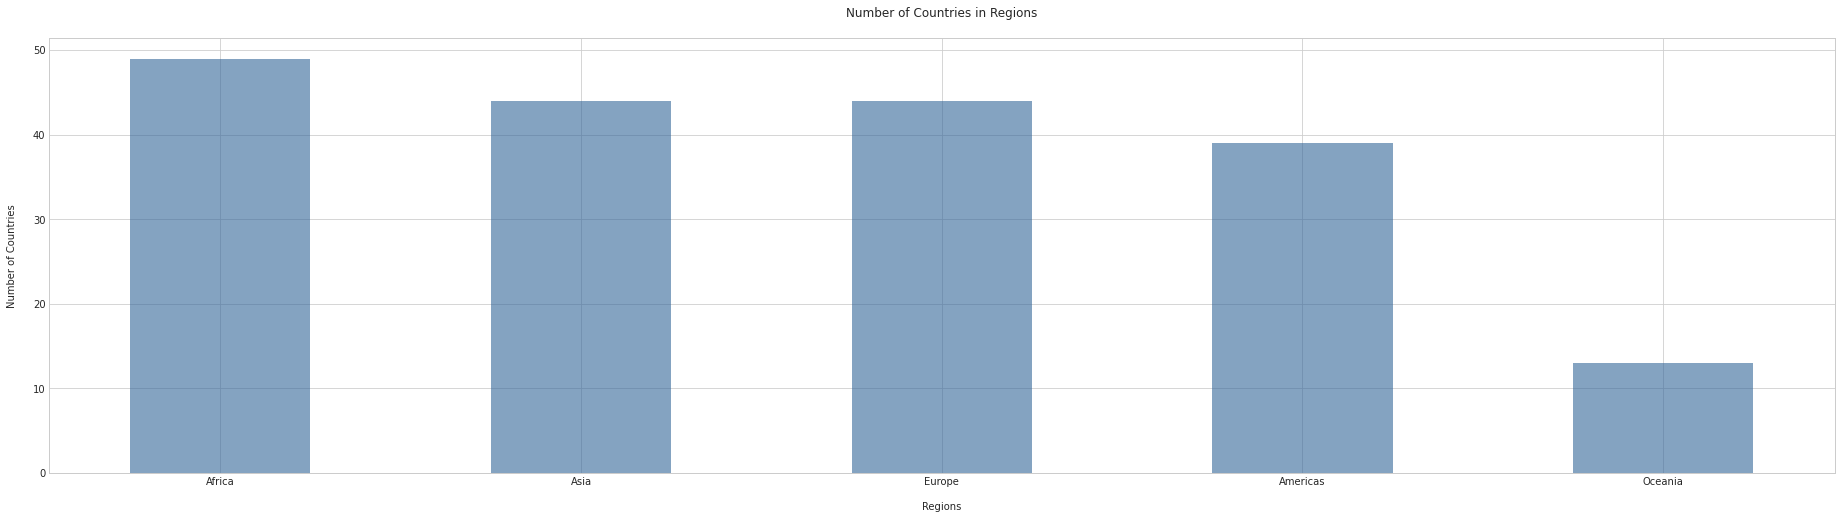

In [114]:
df2 = df.groupby('region')['country_code'].count().sort_values(ascending=False)
region = list(df2.index)
country = list(df2.values)

fig = plt.figure(figsize = (32, 8))

plt.bar(region, country, color=(0.2, 0.4, 0.6, 0.6), width=0.5)
plt.xlabel('\nRegions')
plt.ylabel('Number of Countries\n')
plt.title('Number of Countries in Regions\n')
plt.show()

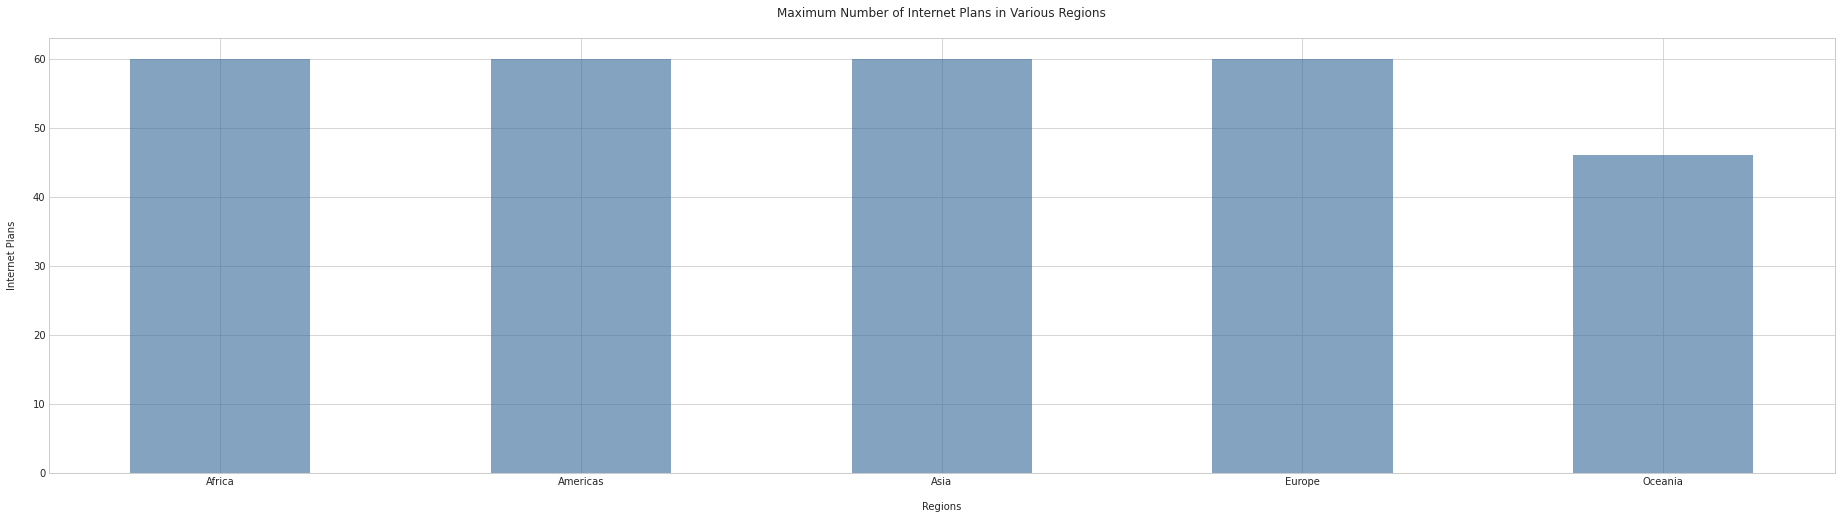

In [115]:
df2 = df.groupby('region')['no_of_internet_plans'].max()
region = list(df2.index)
plans = list(df2.values)

fig = plt.figure(figsize = (32, 8))

plt.bar(region, plans, color=(0.2, 0.4, 0.6, 0.6), width=0.5)

plt.xlabel('\nRegions')
plt.ylabel('Internet Plans\n')
plt.title('Maximum Number of Internet Plans in Various Regions\n')
plt.show()

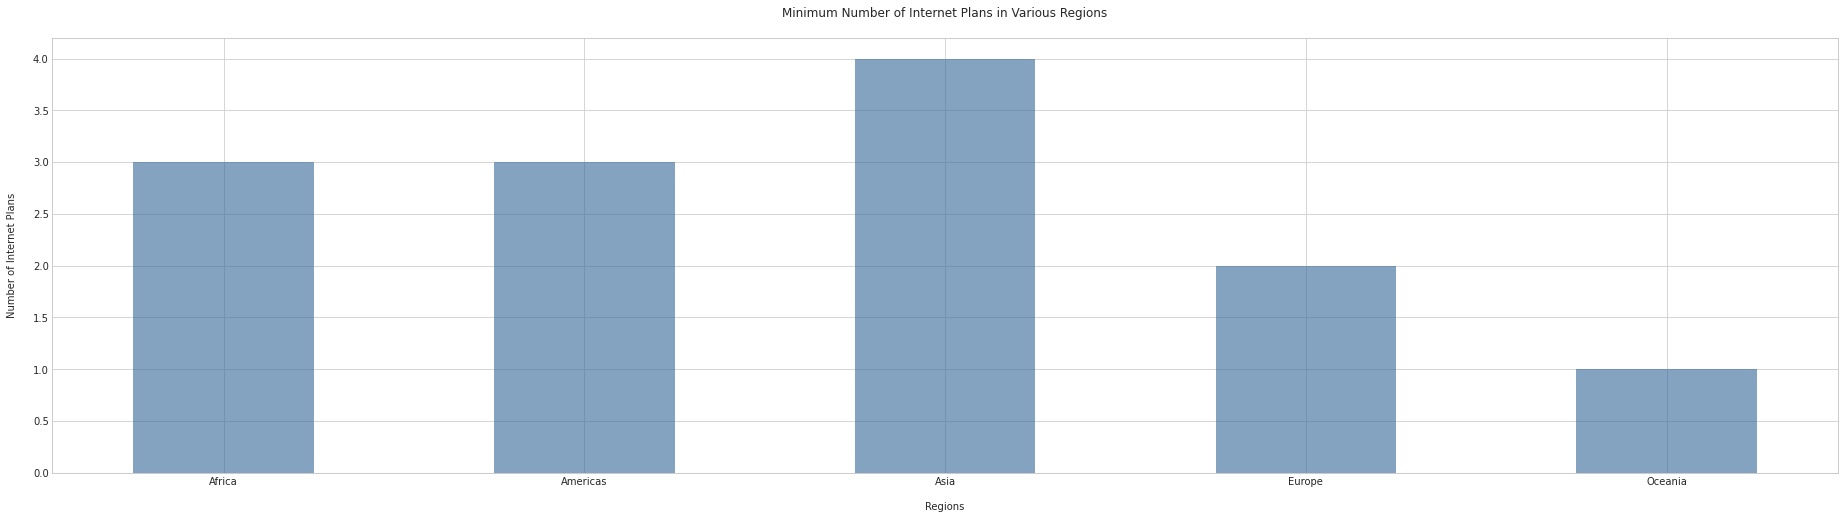

In [116]:
df2 = df.groupby('region')['no_of_internet_plans'].min()
region = list(df2.index)
plans = list(df2.values)

fig = plt.figure(figsize = (32, 8))

plt.bar(region, plans, color=(0.2, 0.4, 0.6, 0.6), width=0.5)

plt.xlabel('\nRegions')
plt.ylabel('Number of Internet Plans\n')
plt.title('Minimum Number of Internet Plans in Various Regions\n')
plt.show()

In [117]:
# the cheapest internet price

df[df['average_price_of_1_gb_euro'] == df['average_price_of_1_gb_euro'].min()]

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
0,IL,Israel,27.0,0.05,0.02,20.95,0.11,0.9,Western Asia,Asia,6788737.0,8381516.0,28.01,12.222222,80.996529


In [118]:
# the most expensive internet price

df[df['average_price_of_1_gb_euro'] == df['average_price_of_1_gb_euro'].max()]

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
225,GQ,Equatorial Guinea,4.0,49.67,45.16,63.22,12.78,47.39,Middle Africa,Africa,332642.0,1308975.0,NaN,26.967715,25.412403


In [119]:
# the fastest internet country
df[df.avg_mbit_s_ookla == df.avg_mbit_s_ookla.max()]

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
201,AE,United Arab Emirates,51.0,7.62,0.8,34.3,3.78,10.23,Western Asia,Asia,8913217.0,9630959.0,135.35,36.950147,92.547554


In [120]:
# the slowest internet user country
df[df.avg_mbit_s_ookla == df.avg_mbit_s_ookla.min()]

,country_code,name,no_of_internet_plans,average_price_of_1_gb_euro,cheapest_1_gb_for_30_days_euro,most_expensive_1_gb_euro,average_price_of_1_gb_euro_at_the_start_of_2021,average_price_of_1_gb_euro_at_start_of_2020,subregion,region,internet_users,population,avg_mbit_s_ookla,average_price_of_2021_2020,internet_user_%
53,AF,Afghanistan,35.0,1.02,0.38,2.12,1.55,1.6,Southern Asia,Asia,4068194.0,37171921.0,5.5,96.875,10.944266
